In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [8]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [9]:
data = pd.read_excel('18221140.xlsx')
data

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
0,Wanita,42.0,S2,Pengusaha,> Rp 10 juta,Bandung,600%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,Jumlah barang yang diterima kurang,NaN,NaN
1,Pria,45.0,D3,Pegawai Negeri,> Rp 10 juta,Depok,300%,Ya,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
2,Wanita,18.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,1500%,Sama saja,NaN,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,menggunakan fitur Paylater,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,Saldo eMoney/ eWallet berkurang tanpa melakuka...
3,Wanita,19.0,SMA,Pelajar / Mahasiswa,Rp 2 juta – Rp 5 juta,Depok,800%,Ya,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wanita,19.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,NaN,Sama saja,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Wanita,19.0,S1,Pelajar / Mahasiswa,< Rp 2 juta,PURWOKERTO,2000%,Ya,Berbelanja online,NaN,...,NaN,NaN,NaN,NaN,NaN,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
296,Wanita,49.0,S1,Ibu Rumah Tangga,Rp 2 juta – Rp 5 juta,Jakarta,800%,Ya,Berbelanja online,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
297,Wanita,45.0,S1,Karyawan Swasta,> Rp 10 juta,Jakarta,1200%,Ya,Berbelanja online,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN
298,Pria,36.0,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,Bogor,500%,Ya,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Nomor 1
Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi jenis kelamin responden.

In [10]:
data.shape

(300, 150)

In [11]:
n = data.shape[0]
n #menghitung n data dari banyak baris pada dataframe

300

In [12]:
gender = data['Jenis Kelamin'].value_counts()
gender

Pria      151
Wanita    149
Name: Jenis Kelamin, dtype: int64

Text(0.5, 1.0, 'Proporsi Jenis Kelamin dengan Jumlah Responden 300')

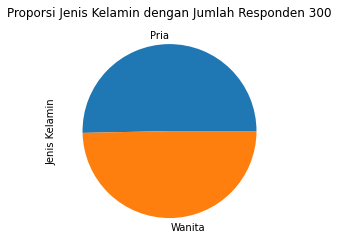

In [13]:
gender_pie = data["Jenis Kelamin"].value_counts().plot(kind="pie")
plt.title("Proporsi Jenis Kelamin dengan Jumlah Responden {}".format(n))

# Nomor 2
Buat tabel frekuensi dan proporsi untuk jenis kelamin responden!

In [14]:
for x in list(data.columns)[0:1]:
    print('Berikut merupakan tabel frekuensi dan proporsi untuk jenis kelamin responden')
    data1 = pd.DataFrame(data[x].value_counts()).reset_index()
    data1['Proporsi'] = data1[x]/n
    data1.columns = [x, 'Frekuensi', 'Proporsi']
    print(data1)

Berikut merupakan tabel frekuensi dan proporsi untuk jenis kelamin responden
  Jenis Kelamin  Frekuensi  Proporsi
0          Pria        151  0.503333
1        Wanita        149  0.496667


# Nomor 3
Buat histogram untuk data umur responden!

In [15]:
u = data['Usia'].value_counts()

In [16]:
u1 = u.count()
u1

48

In [17]:
for x in list(data.columns)[1:2]:
    data1 = pd.DataFrame(data[x].value_counts()).reset_index()
    data1['Proporsi'] = data1[x]/n
    data1.columns = ['Umur', 'Frekuensi', 'Proporsi']
    u = pd.concat([u, data1], axis = 1)
    u = u.reset_index(drop = True)

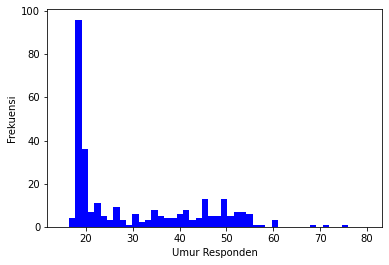

In [18]:
plt.hist(data['Usia'], bins=u1, range=(15,80), color='blue')
plt.xlabel('Umur Responden')
plt.ylabel('Frekuensi')
plt.show()

# Nomor 4
Buat boxplot untuk data umur responden!

(0.0, 100.0)

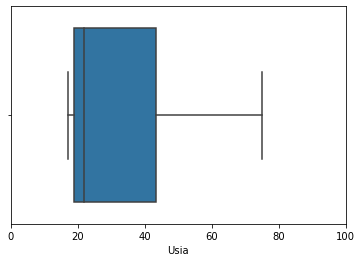

In [19]:
sns.boxplot(x=data['Usia'])
plt.xlim(0,100)

# Nomor 5
Identifikasi nilai mean, Q1, Q2/median, Q3, min, max dari data umur responden! 

In [20]:
print('mean :', data['Usia'].mean())
print('Q1 :', data['Usia'].quantile(0.25))
print('Q2 atau median :', data['Usia'].quantile(0.5))
print('Q3 :', data['Usia'].quantile(0.75))
print('min :', data['Usia'].min())
print('max :', data['Usia'].max())

mean : 43.49832775919732
Q1 : 19.0
Q2 atau median : 22.0
Q3 : 43.5
min : 17.0
max : 2002.0


In [21]:
#untuk mengoreksi
#data.describe()

# Nomor 6
Apakah terdapat outlier pada data umur responden. (Definisi outlier : < Q1 – 1.5 IQR atau > Q3 + 1.5 IQR; IQR = Q3 – Q1)

In [22]:
# Mengecek outlier dengan IQR
Q1 = data['Usia'].quantile(0.25)
Q3 = data['Usia'].quantile(0.75)
IQR = Q3 - Q1

In [23]:
upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

In [24]:
outliers = data.Usia[(data.Usia > upper) | (data.Usia < lower)]
print(outliers)

188    1949.0
223    2002.0
Name: Usia, dtype: float64


# Nomor 7
Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /proporsi profesi responden!

In [25]:
for y in list(data.columns)[3:4]:
    data2 = pd.DataFrame(data[y].value_counts()).reset_index()
    data2['Proporsi'] = data2[y]/n
    data2.columns = [y, 'Frekuensi', 'Proporsi']

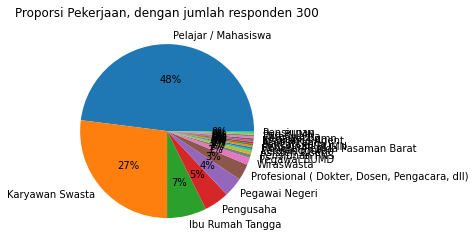

In [26]:
plt.pie(data2['Proporsi'], labels = list(data2[y]), autopct='%.0f%%', normalize=False)
plt.title('Proporsi Pekerjaan, dengan jumlah responden {}'.format(n))
plt.show()

# Nomor 8
Buat tabel frekuensi dan proporsi untuk profesi responden!

In [27]:
for y in list(data.columns)[3:4]:
    print('Berikut merupakan tabel frekuensi dan proporsi untuk pekerjaan responden')
    data2 = pd.DataFrame(data[y].value_counts()).reset_index()
    data2['Proporsi'] = data2[y]/n
    data2.columns = [y, 'Frekuensi', 'Proporsi']
    print(data2)

Berikut merupakan tabel frekuensi dan proporsi untuk pekerjaan responden
                                       Pekerjaan  Frekuensi  Proporsi
0                            Pelajar / Mahasiswa        144  0.480000
1                                Karyawan Swasta         81  0.270000
2                               Ibu Rumah Tangga         22  0.073333
3                                      Pengusaha         14  0.046667
4                                 Pegawai Negeri         11  0.036667
5   Profesional ( Dokter, Dosen, Pengacara, dll)          9  0.030000
6                                     Wiraswasta          4  0.013333
7                                   Pegawai BUMD          2  0.006667
8                                  Pensiunan PNS          2  0.006667
9                                 Asisten Riset           1  0.003333
10                                  Pengangguran          1  0.003333
11                   Honorer Pemda Pasaman Barat          1  0.003333
12               

# Nomor 9
Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir.

In [28]:
for z in list(data.columns)[7:8]:
    data3 = pd.DataFrame(data[z].value_counts()).reset_index()
    data3['Proporsi'] = data3[z]/n
    data3.columns = [z, 'Frekuensi', 'Proporsi']

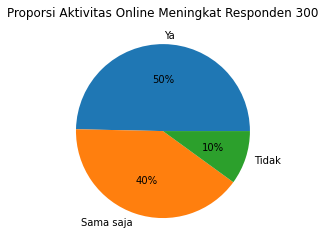

In [29]:
plt.pie(data3['Proporsi'], labels=list(data3[z]), autopct='%.0f%%', normalize=False)
plt.title('Proporsi {} Responden {}'.format(z,n))
plt.show()

# Nomor 10
Buat tabel frekuensi dan proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir!

In [30]:
for z in list(data.columns)[7:8]:
    print('Berikut merupakan tabel yang menunjukkan naik/turun aktivitas online responden')
    data3 = pd.DataFrame(data[z].value_counts()).reset_index()
    data3['Proporsi'] = data3[z]/n
    data3.columns = [z, 'Frekuensi', 'Proporsi']
    print(data3)

Berikut merupakan tabel yang menunjukkan naik/turun aktivitas online responden
  Aktivitas Online Meningkat  Frekuensi  Proporsi
0                         Ya        149  0.496667
1                  Sama saja        121  0.403333
2                      Tidak         30  0.100000


# Nomor 11
Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 bank yang ada di
kolom bank_1 sampai bank_7 !

In [31]:
bank=pd.DataFrame()
for a in list(data.columns)[15:22]:
    data4 = pd.DataFrame(data[a].value_counts()).reset_index()
    data4['Proporsi'] = data4[a]/n
    data4.columns = ['Nama Bank', 'Frekuensi', 'Proporsi']
    bank = pd.concat([bank, data4], axis = 0)
    bank = bank.reset_index(drop = True)

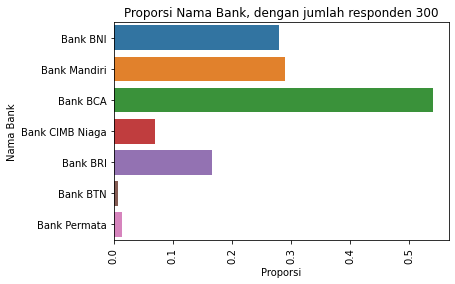

In [32]:
sns.barplot(data=bank, x='Proporsi', y='Nama Bank')
plt.title('Proporsi Nama Bank, dengan jumlah responden {}'.format(n))
plt.xticks(rotation=90)
plt.show()

# Nomor 12
Buat tabel frekuensi dan proporsi pengguna 7 bank yang ada di kolom bank_1 sampai bank_7.

In [33]:
bank=pd.DataFrame()
for a in list(data.columns)[15:22]:
    data4 = pd.DataFrame(data[a].value_counts()).reset_index()
    data4['Proporsi'] = data4[a]/n
    data4.columns = ['Nama Bank', 'Frekuensi', 'Proporsi']
    bank = pd.concat([bank, data4], axis = 0)
    bank = bank.reset_index(drop = True)
print(bank)

         Nama Bank  Frekuensi  Proporsi
0         Bank BNI         84  0.280000
1     Bank Mandiri         87  0.290000
2         Bank BCA        162  0.540000
3  Bank CIMB Niaga         21  0.070000
4         Bank BRI         50  0.166667
5         Bank BTN          2  0.006667
6     Bank Permata          4  0.013333


# Nomor 13
Hitung confidence interval 95% untuk proporsi pengguna Bank BCA!

In [71]:
bank_bca = bank.at[2, 'Proporsi']
error = norm.ppf(0.95)*(0.54*(1-0.54)/n)**(0.5)
lower = bank_bca - error
upper = bank_bca + error
print('{} < P-BCA < {}'.format(lower, upper))

0.4926693547477852 < P-BCA < 0.5873306452522148


# Nomor 14
Lakukan uji hipotesis berikut:

In [72]:
P0_BCA = 0.5
Z_alpha = norm.ppf(1-(2.5/100))
print('critical region = {z >', Z_alpha, '} U {z < ',-Z_alpha, '}')
z = n * (0.54-P0_BCA) / (n * P0_BCA * (1-P0_BCA))**(0.5)

print('z = ', z)
print('Kesimpulan : H0 gagal ditolak.')

critical region = {z > 1.959963984540054 } U {z <  -1.959963984540054 }
z =  1.385640646055103
Kesimpulan : H0 gagal ditolak.


# Nomor 15
Buat bar chart yang menunjukkan perbedaan frekuensi / proporsi untuk preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”!

In [73]:
transfer = pd.DataFrame()
for x in list(data.columns)[30:31]:
    data5 = pd.DataFrame(data[x].value_counts()).reset_index()
    data5['Proporsi'] = data5[x]/n
    data5.columns = ['Transfer Antar Bank', 'Frekuensi', 'Proporsi']
    transfer = pd.concat([transfer, data5], axis=0)
    transfer = transfer.reset_index(drop=True)

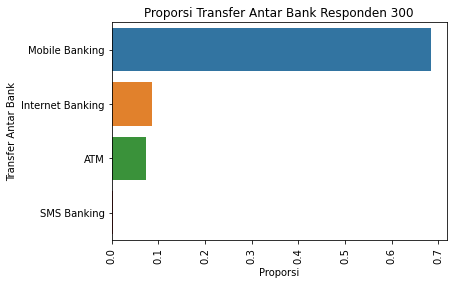

In [74]:
sns.barplot(data=transfer, x='Proporsi', y='Transfer Antar Bank')
plt.title('Proporsi Transfer Antar Bank Responden {}'.format(n))
plt.xticks(rotation=90)
plt.show()

# Nomor 16
Buat tabel frekuensi dan proporsi untuk preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”!

In [75]:
transfer = pd.DataFrame()
for x in list(data.columns)[30:31]:
    data5 = pd.DataFrame(data[x].value_counts()).reset_index()
    data5['Proporsi'] = data5[x]/n
    data5.columns = ['Transfer Antar Bank', 'Frekuensi', 'Proporsi']
    transfer = pd.concat([transfer, data5], axis=0)
    transfer = transfer.reset_index(drop=True)
print(transfer)

  Transfer Antar Bank  Frekuensi  Proporsi
0      Mobile Banking        205  0.683333
1    Internet Banking         26  0.086667
2                 ATM         22  0.073333
3         SMS Banking          1  0.003333


# Nomor 17
Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 emoney yang ada di kolom emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah)

In [76]:
emoney = pd.DataFrame()
for x in list(data.columns)[37:44]:
    data6 = pd.DataFrame(data[x].value_counts()).reset_index()
    data6['Proporsi'] = data6[x]/n
    data6.columns = ['E-money', 'Frekuensi', 'Proporsi']
    emoney = pd.concat([emoney, data6], axis=0)
    emoney = emoney.reset_index(drop=True)

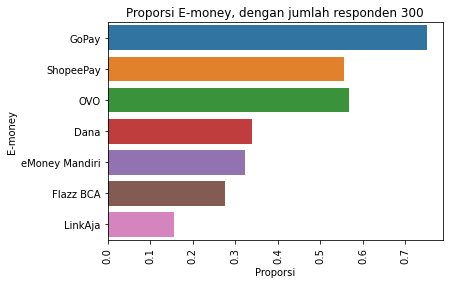

In [77]:
sns.barplot(data=emoney, x='Proporsi', y='E-money')
plt.title('Proporsi E-money, dengan jumlah responden {}'.format(n))
plt.xticks(rotation=90)
plt.show()

# Nomor 18
Buat tabel frekuensi dan proporsi pengguna 7 emoney yang ada di kolom emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah)!

In [78]:
emoney = pd.DataFrame()
for x in list(data.columns)[37:44]:
    data6 = pd.DataFrame(data[x].value_counts()).reset_index()
    data6['Proporsi'] = data6[x]/n
    data6.columns = ['E-money', 'Frekuensi', 'Proporsi']
    emoney = pd.concat([emoney, data6], axis=0)
    emoney = emoney.reset_index(drop=True)
print(emoney)

          E-money  Frekuensi  Proporsi
0           GoPay        225  0.750000
1       ShopeePay        167  0.556667
2             OVO        170  0.566667
3            Dana        102  0.340000
4  eMoney Mandiri         97  0.323333
5       Flazz BCA         83  0.276667
6         LinkAja         47  0.156667


# Nomor 19
Hitung confidence interval 95% untuk selisih proporsi pengguna Gopay dan OVO!

In [79]:
Z_alpha=norm.ppf(1-(2.5/10))
P_gopay=0.750000
P_ovo=0.566667
gopay_ovo=P_gopay-P_ovo

n_money=len(data)

eror_gopay_ovo = Z_alpha * ((P_gopay*(1-P_gopay)/n_money) + (P_ovo*(1-P_ovo)/n_money))**(0.5)

print(gopay_ovo - eror_gopay_ovo, ' < P gopay - P ovo < ', gopay_ovo + eror_gopay_ovo)

0.15770666424703828  < P gopay - P ovo <  0.20895933575296166


# Nomor 20
Lakukan uji hipotesis berikut:

In [80]:
Z_alpha_per2 = norm.ppf(1-(5/100))
P_hat = (225 + 170)/(n_money*2)

print('Critical region = { z > ', Z_alpha_per2, '}')

z2 = gopay_ovo / (P_hat*(1-P_hat)*(2/n_money))**(0.5)

print('z= ',z2)
print('Kesimpulan: H0 berhasil ditolak.')

Critical region = { z >  1.6448536269514722 }
z=  4.7343683741881675
Kesimpulan: H0 berhasil ditolak.


# Nomor 21
Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi /
proporsi untuk nominal yang biasa dipakai untuk top up emoney!

In [81]:
for x in list(data.columns)[70:71]:
    data7 = pd.DataFrame(data[x].value_counts()).reset_index()
    data7['Proporsi'] = data7[x]/n
    data7.columns = [x, 'Frekuensi', 'Proporsi']

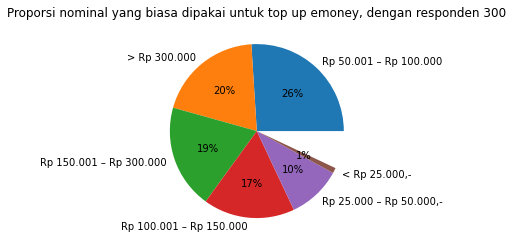

In [82]:
plt.pie(data7['Proporsi'],  labels=list(data7[x]), autopct='%.0f%%', normalize=False)
plt.title('Proporsi nominal yang biasa dipakai untuk top up emoney, dengan responden {}'.format(n))
plt.show()

# Nomor 22
Buat tabel frekuensi dan proporsi untuk nominal yang biasa dipakai untuk top up
emoney!

In [83]:
for x in list(data.columns)[70:71]:
    data7 = pd.DataFrame(data[x].value_counts()).reset_index()
    data7['Proporsi'] = data7[x]/n
    data7.columns = [x, 'Frekuensi', 'Proporsi']
print(data7)

  39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?  Frekuensi  \
0                             Rp 50.001 – Rp 100.000                    78   
1                                       > Rp 300.000                    59   
2                            Rp 150.001 – Rp 300.000                    58   
3                            Rp 100.001 – Rp 150.000                    51   
4                            Rp 25.000 – Rp 50.000,-                    30   
5                                      < Rp 25.000,-                     3   

   Proporsi  
0  0.260000  
1  0.196667  
2  0.193333  
3  0.170000  
4  0.100000  
5  0.010000  


# Nomor 23
Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 ecommerce yang ada di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)

In [84]:
e_commerce = pd.DataFrame()
for x in list(data.columns)[116:123]:
    data8 = pd.DataFrame(data[x].value_counts()).reset_index()
    data8['Proporsi'] = data8[x]/n
    data8.columns = ['Nama E-Commerce', 'Frekuensi', 'Proporsi']
    e_commerce = pd.concat([e_commerce, data8], axis=0)
    e_commerce = e_commerce.reset_index(drop=True)

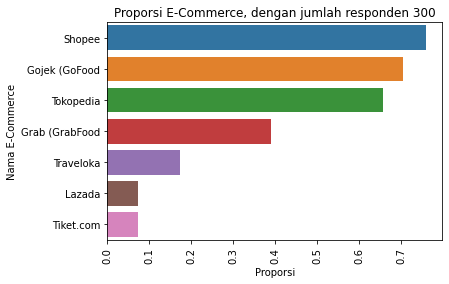

In [85]:
sns.barplot(data=e_commerce, x='Proporsi', y='Nama E-Commerce')
plt.title('Proporsi E-Commerce, dengan jumlah responden {}'.format(n))
plt.xticks(rotation=90)
plt.show()

# Nomor 24
Buat tabel frekuensi dan proporsi pengguna 7 ecommerce yang ada di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)!

In [49]:
e_commerce = pd.DataFrame()
for x in list(data.columns)[116:123]:
    data8 = pd.DataFrame(data[x].value_counts()).reset_index()
    data8['Proporsi'] = data8[x]/n
    data8.columns = ['Nama E-Commerce', 'Frekuensi', 'Proporsi']
    e_commerce = pd.concat([e_commerce, data8], axis=0)
    e_commerce = e_commerce.reset_index(drop=True)
print('Tabel Frekuensi dan Proporsi pengguna E-Commerce 1-7')
print(e_commerce)

Tabel Frekuensi dan Proporsi pengguna E-Commerce 1-7
  Nama E-Commerce  Frekuensi  Proporsi
0          Shopee        228  0.760000
1   Gojek (GoFood        211  0.703333
2       Tokopedia        197  0.656667
3  Grab (GrabFood        117  0.390000
4       Traveloka         52  0.173333
5          Lazada         22  0.073333
6       Tiket.com         22  0.073333


# Nomor 25
Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk responden yang prefer beli handphone secara offline vs online!

In [50]:
method = pd.DataFrame()
for x in list(data.columns)[99:100]:
    data9 = pd.DataFrame(data[x].value_counts()).reset_index()
    data9['Proporsi'] = data9[x]/n
    data9.columns = ['Metode Pembelian', 'Frekuensi', 'Proporsi']
    method = pd.concat([method, data9], axis = 0)
    method = method.reset_index(drop = True)

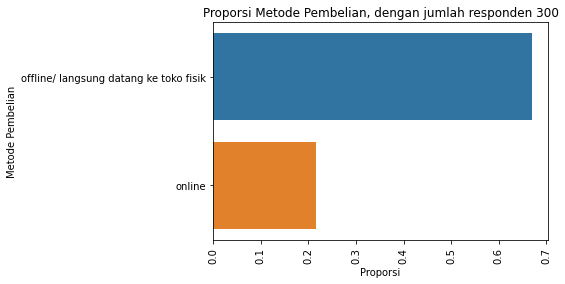

In [51]:
sns.barplot(data = method, x = 'Proporsi', y = 'Metode Pembelian')
plt.title('Proporsi Metode Pembelian, dengan jumlah responden {}'.format(n))
plt.xticks(rotation=90)
plt.show()

# Nomor 26
Buat tabel frekuensi dan proporsi untuk responden yang prefer beli handphone secara offline vs online!

In [52]:
method = pd.DataFrame()
for x in list(data.columns)[99:100]:
    data9 = pd.DataFrame(data[x].value_counts()).reset_index()
    data9['Proporsi'] = data9[x]/n
    data9.columns = ['Metode Pembelian', 'Frekuensi', 'Proporsi']
    method = pd.concat([method, data9], axis = 0)
    method = method.reset_index(drop = True)
print('Tabel Frekuensi dan Proporsi Metode Pembelian HP (online/offline)')
print(method)

Tabel Frekuensi dan Proporsi Metode Pembelian HP (online/offline)
                         Metode Pembelian  Frekuensi  Proporsi
0  offline/ langsung datang ke toko fisik        201  0.670000
1                                  online         65  0.216667


# Nomor 27
Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk tempat beli makanan online yang pilihan responden!

In [87]:
beli_makanan = pd.DataFrame()
for x in list(data.columns)[128:129]:
    data10 = pd.DataFrame(data[x].value_counts()).reset_index()
    data10['Proporsi'] = data10[x]/n
    data10.columns = ['Tempat Pembelian Makan', 'Frekuensi', 'Proporsi']
    makan = pd.concat([makan, data10])
    makan = makan.reset_index(drop=True)

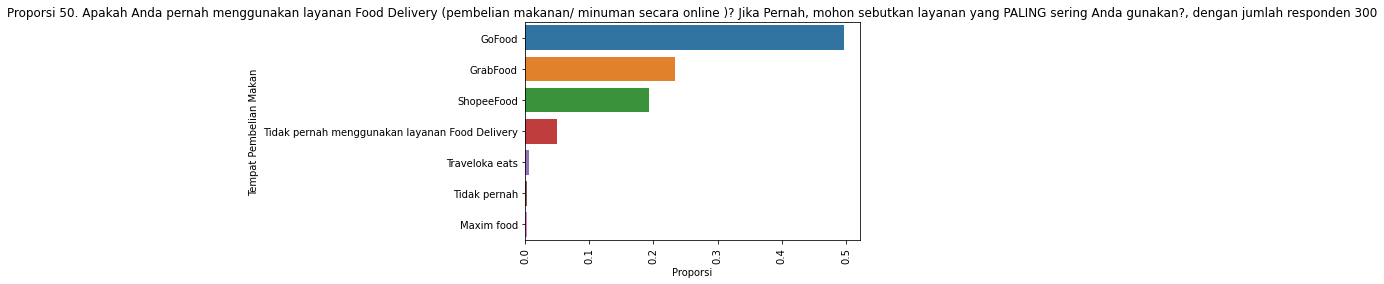

In [88]:
sns.barplot(data = makan, x = 'Proporsi', y = 'Tempat Pembelian Makan')
plt.title('Proporsi {}, dengan jumlah responden {}'.format(x,n))
plt.xticks(rotation=90)
plt.show()

# Nomor 28
Buat tabel frekuensi dan proporsi untuk tempat beli makanan online yang pilihan
responden!

In [90]:
beli_makanan = pd.DataFrame()
for x in list(data.columns)[128:129]:
    data10 = pd.DataFrame(data[x].value_counts()).reset_index()
    data10['Proporsi'] = data10[x]/n
    data10.columns = ['Tempat Pembelian Makan', 'Frekuensi', 'Proporsi']
    makan = pd.concat([makan, data10])
    makan = makan.reset_index(drop=True)
print('Tabel Frekuensi dan Proporsi Tempat Beli Makanan Online Pilihan')
print(makan)

Tabel Frekuensi dan Proporsi Tempat Beli Makanan Online Pilihan
                            Tempat Pembelian Makan  Frekuensi  Proporsi
0                                           GoFood        149  0.496667
1                                         GrabFood         70  0.233333
2                                       ShopeeFood         58  0.193333
3   Tidak pernah menggunakan layanan Food Delivery         15  0.050000
4                                   Traveloka eats          2  0.006667
5                                     Tidak pernah          1  0.003333
6                                       Maxim food          1  0.003333
7                                           GoFood        149  0.496667
8                                         GrabFood         70  0.233333
9                                       ShopeeFood         58  0.193333
10  Tidak pernah menggunakan layanan Food Delivery         15  0.050000
11                                  Traveloka eats          2  0.006667


# NO 29

In [91]:
anova = pd.read_excel('xxx.xlsx')
anova.head()

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
0,Wanita,42.0,S2,Pengusaha,> Rp 10 juta,Bandung,600%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,Jumlah barang yang diterima kurang,NaN,NaN
1,Pria,45.0,D3,Pegawai Negeri,> Rp 10 juta,Depok,300%,Ya,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
2,Wanita,18.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,1500%,Sama saja,NaN,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,menggunakan fitur Paylater,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,Saldo eMoney/ eWallet berkurang tanpa melakuka...
3,Wanita,19.0,SMA,Pelajar / Mahasiswa,Rp 2 juta – Rp 5 juta,Depok,800%,Ya,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wanita,19.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,NaN,Sama saja,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
model = ols('Usia ~ C(pembelian)', data=anova).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(pembelian),6.0,2.446493e+05,40774.879801,1.602788,0.146133
Residual,288.0,7.326713e+06,25439.976327,NaN,NaN


In [93]:
f_alpha = st.f.ppf(0.95, dfn = 2, dfd = 288)
print(f'crit Region: f > {f_alpha:.2f}')
print('Kesimpulan: f diluar crit region, H0 gagal ditolak')

crit Region: f > 3.03
Kesimpulan: f diluar crit region, H0 gagal ditolak


In [96]:
pvalue = 1 - st.f.cdf(1.602788, 2, 288)
pvalue

0.20312499569205822

# NO 30

In [95]:
1. Dari data yang diolah terdiri dari 50% responden wanita dan 50% pria
2. Responden terbanyak adalah pelajar/mahasiswa sebanyak 144 responden
3. Aktivitas online dari 50% responden meningkat dalam 3 bulan terakhir,
   sementara itu 40% menyatakan sama saja, dan 10% menyatakan tidak meningkat 
4. Bank yang paling banyak digunakan yakni BCA dengan frekuensi sebanyak 160
   pengguna dan proporsi sebesar 0.394089
5. Pengguna paling banyak melakukan transfer antarbank menggunakan mobile banking
   dengan frekuensi sebanyak 202 dan proporsi sebesar 0.827869
6. Gopay menjadi e-Money paling banyak digunakan sebanyak 230 dengan proporsi 0.265589
7. Layanan GoFood menjadi yang terbanyak digunakan oleh responden
   untuk melakukan pembelian makanan/minuman secara online sebanyak 138 orang dan proporsi sebesar 0.467797

SyntaxError: invalid syntax (<ipython-input-95-e7d53bfd8e3d>, line 1)